Made by J.Kim (Sep.02 - 2022)

Feature
- Prediction of (1) Dezincification ratio (Deg_M), (2) Metallization ratio (Deg_R)
- Input features: Feed compositions of 'raw pellet'
- Data obtained from the commercial operational plant data

Overview
- Step 1. Import section
- Step 2. Load data and processing

Step 1. Import section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split

Step 2. Load data and preprocessing

In [2]:
raw_df = pd.read_csv('RHF_simulation_result.csv')
raw_df.head(3)

,TFe,MFe,FeO,Fe2O3,C,Zn,DegZ,DegM
0,0.49290,0.0689,0.2733,0.3025,0.0986,0.02237,0.8407,0.5672
1,0.54219,0.0689,0.2733,0.3025,0.0986,0.02237,0.8407,0.5672
2,0.44361,0.0689,0.2733,0.3025,0.0986,0.02237,0.8407,0.5672


In [3]:
# Split Test Data for Final Check
X_train, X_test, y_train, y_test = train_test_split(raw_df.iloc[:,:-2], raw_df.iloc[:,-2:], 
                                                    test_size=0.2, random_state=42)

In [5]:
# Dataframe Concatenate for Pycaret
df_py_train = pd.concat([X_train, y_train], axis=1)
df_py_test = pd.concat([X_test, y_test], axis=1)

Step 3a-1. Automated Machine-learning (Deg_Z)

In [6]:
from pycaret.regression import *
exp_reg101 = setup(data = df_py_train, numeric_features=None, ignore_features=['DegM'],
                   target = 'DegZ', session_id=123, log_experiment = False, normalize= True, use_gpu = False , silent = True)

,Description,Value
0,session_id,123
1,Target,DegZ
2,Original Data,"(5647, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3952, 6)"


In [7]:
Deg_Z = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0071,0.0001,0.0098,0.8323,0.0054,0.0085,0.2730
lightgbm,Light Gradient Boosting Machine,0.0087,0.0001,0.0116,0.7687,0.0063,0.0104,0.0710
et,Extra Trees Regressor,0.0090,0.0002,0.0129,0.7146,0.0070,0.0107,0.4740
rf,Random Forest Regressor,0.0097,0.0002,0.0134,0.6879,0.0073,0.0115,0.7650
gbr,Gradient Boosting Regressor,0.0125,0.0003,0.0161,0.5555,0.0087,0.0149,0.2190
ada,AdaBoost Regressor,0.0158,0.0004,0.0194,0.3494,0.0105,0.0186,0.1350
lar,Least Angle Regression,0.0152,0.0004,0.0201,0.3070,0.0110,0.0181,0.0210
br,Bayesian Ridge,0.0152,0.0004,0.0201,0.3070,0.0110,0.0181,0.0180
ridge,Ridge Regression,0.0152,0.0004,0.0201,0.3070,0.0110,0.0181,0.0210
lr,Linear Regression,0.0152,0.0004,0.0201,0.3070,0.0110,0.0181,1.1160


In [8]:
XGB_Z = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0076,0.0001,0.0107,0.7936,0.0058,0.0091
1,0.0068,0.0001,0.0093,0.8331,0.0051,0.0081
2,0.0071,0.0001,0.0102,0.8258,0.0056,0.0084
3,0.0070,0.0001,0.0095,0.8608,0.0052,0.0083
4,0.0070,0.0001,0.0093,0.8638,0.0050,0.0084
5,0.0070,0.0001,0.0094,0.8209,0.0051,0.0083
6,0.0074,0.0001,0.0105,0.8300,0.0058,0.0088
7,0.0071,0.0001,0.0099,0.8258,0.0054,0.0085
8,0.0068,0.0001,0.0096,0.8321,0.0052,0.0081


In [9]:
save_model(XGB_Z, 'XGB_Z_before_HPO')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['DegM'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='DegZ',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_oneh

Step 3a-2. Hyperparameter optimization

In [9]:
Tuend_XGB_Z = tune_model(XGB_Z, n_iter=10000, optimize='R2', 
                            search_library='scikit-learn', 
                            search_algorithm='random')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0058,0.0001,0.0079,0.8881,0.0043,0.0069
1,0.0052,0.0000,0.0069,0.9078,0.0038,0.0062
2,0.0056,0.0001,0.0074,0.9081,0.0040,0.0067
3,0.0055,0.0001,0.0074,0.9164,0.0040,0.0065
4,0.0051,0.0000,0.0067,0.9290,0.0036,0.0061
5,0.0052,0.0000,0.0071,0.8981,0.0038,0.0062
6,0.0056,0.0001,0.0086,0.8869,0.0047,0.0067
7,0.0057,0.0001,0.0076,0.8988,0.0041,0.0067
8,0.0053,0.0001,0.0075,0.8973,0.0041,0.0063
9,0.0062,0.0001,0.0082,0.8927,0.0045,0.0074


Step 3a-3. Save model (Deg_Z) - Integrate with single/multi-objective optimization

In [10]:
save_model(Tuend_XGB_Z, 'Tuend_XGB_Z')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['DegM'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='DegZ',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=7, min_child_weight=4,
                               missing=nan, monotone_constraints='()',
                               n_estimators

Step 3b-1. Automated Machine-learning (Deg_M)

In [10]:
from pycaret.regression import *
exp_reg102 = setup(data = df_py_train, numeric_features=None, ignore_features=['DegZ'],
                   target = 'DegM', session_id=123, log_experiment = False, normalize= True, use_gpu = False , silent = True)

,Description,Value
0,session_id,123
1,Target,DegM
2,Original Data,"(5647, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3952, 6)"


In [11]:
Deg_M = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0130,0.0003,0.0176,0.8347,0.0108,0.0203,0.2020
lightgbm,Light Gradient Boosting Machine,0.0155,0.0004,0.0206,0.7755,0.0126,0.0244,0.0730
et,Extra Trees Regressor,0.0154,0.0005,0.0221,0.7415,0.0135,0.0242,0.3580
rf,Random Forest Regressor,0.0163,0.0005,0.0231,0.7166,0.0141,0.0257,0.4910
gbr,Gradient Boosting Regressor,0.0223,0.0008,0.0285,0.5678,0.0175,0.0352,0.1630
dt,Decision Tree Regressor,0.0219,0.0012,0.0342,0.3772,0.0209,0.0344,0.0210
ada,AdaBoost Regressor,0.0277,0.0012,0.0344,0.3716,0.0210,0.0431,0.1310
br,Bayesian Ridge,0.0273,0.0012,0.0349,0.3547,0.0213,0.0430,0.0160
lar,Least Angle Regression,0.0273,0.0012,0.0349,0.3547,0.0213,0.0430,0.0160
ridge,Ridge Regression,0.0273,0.0012,0.0349,0.3547,0.0213,0.0430,0.0180


In [12]:
XGB_M = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0121,0.0003,0.0163,0.8370,0.0100,0.0191
1,0.0134,0.0004,0.0195,0.8005,0.0119,0.0210
2,0.0132,0.0003,0.0173,0.8500,0.0106,0.0209
3,0.0119,0.0002,0.0156,0.8618,0.0095,0.0186
4,0.0128,0.0003,0.0170,0.8435,0.0103,0.0199
5,0.0135,0.0003,0.0181,0.8339,0.0110,0.0209
6,0.0123,0.0003,0.0167,0.8573,0.0102,0.0194
7,0.0136,0.0003,0.0187,0.8154,0.0114,0.0216
8,0.0129,0.0003,0.0183,0.8346,0.0112,0.0204


In [13]:
save_model(XGB_M, 'XGB_M_before_HPO')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['DegZ'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='DegM',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_oneh

Step 3b-2. Hyperparameter optimization

In [14]:
Tuend_XGB_M = tune_model(XGB_M, n_iter=10000, optimize='R2', 
                            search_library='scikit-learn', 
                            search_algorithm='random')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0098,0.0002,0.0130,0.8967,0.0080,0.0154
1,0.0100,0.0002,0.0136,0.9025,0.0083,0.0157
2,0.0102,0.0002,0.0133,0.9123,0.0081,0.0162
3,0.0101,0.0002,0.0132,0.9003,0.0081,0.0158
4,0.0093,0.0001,0.0120,0.9215,0.0073,0.0143
5,0.0109,0.0002,0.0145,0.8944,0.0088,0.0169
6,0.0095,0.0002,0.0125,0.9203,0.0076,0.0149
7,0.0101,0.0002,0.0132,0.9076,0.0081,0.0160
8,0.0102,0.0002,0.0137,0.9078,0.0084,0.0161
9,0.0107,0.0002,0.0149,0.8824,0.0091,0.0168


Step 3b-3. Save model (Deg_M) - Integrate with single/multi-objective optimization

In [15]:
save_model(Tuend_XGB_M, 'Tuend_XGB_M')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['DegZ'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='DegM',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                               interaction_constraints='', learning_rate=0.15,
                               max_delta_step=0, max_depth=8, min_child_weight=4,
                               missing=nan, monotone_constraints='()',
                               n_estimator

Step 4. Evaluate
- Evaluation of the model
- SHAP value extraction
- Parity: before vs. after (tuned)

In [21]:
evaluate_model(Tuend_XGB_Z)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
evaluate_model(Tuend_XGB_M)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

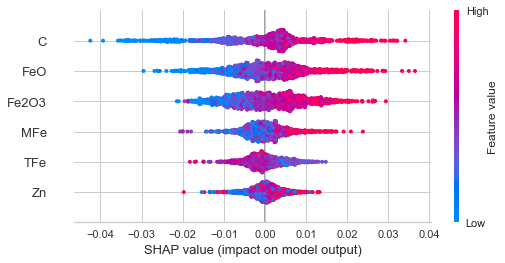

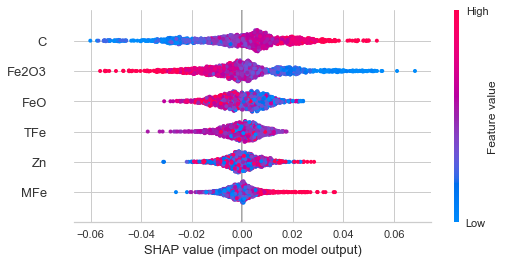

In [17]:
interpret_model(Tuend_XGB_Z)
interpret_model(Tuend_XGB_M)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='DegZ', ylabel='Label'>

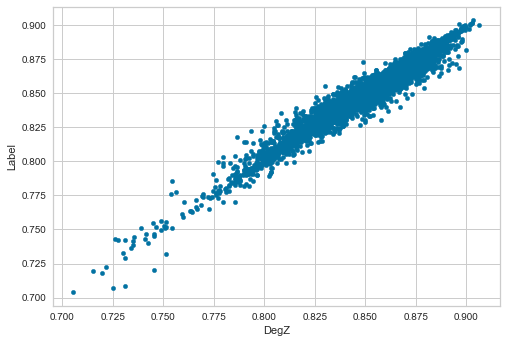

In [19]:
pred_Z = predict_model(Tuend_XGB_Z, data=raw_df)
pred_Z.plot(x='DegZ', y='Label', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='DegM', ylabel='Label'>

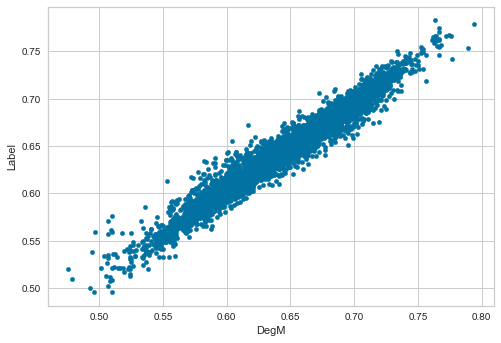

In [20]:
pred_M = predict_model(Tuend_XGB_M, data=raw_df)
pred_M.plot(x='DegM', y='Label', kind='scatter')

Step 4. Test score
 - 20% of data which was not used in the training is introduced in the model test
 - Prediction of the test data > calculate from MATLAB (parity plot)

In [14]:
df_py_test = pd.concat([X_test, y_test], axis=1)

Model_M_before_HPO = load_model ('XGB_M_before_HPO')
Model_Z_before_HPO = load_model ('XGB_Z_before_HPO')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [18]:
df_py_test = pd.concat([X_test, y_test], axis=1)

Model_M = load_model ('Tuend_XGB_M')
Model_Z = load_model ('Tuend_XGB_Z')

Transformation Pipeline and Model Successfully Loaded
[16:50:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:1040: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[16:50:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:749: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.
[16:50:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:438: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XG

In [15]:
prediction_M_before_HPO = predict_model (Model_M_before_HPO, data = df_py_test)
prediction_Z_before_HPO = predict_model (Model_Z_before_HPO, data = df_py_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.0126,0.0003,0.0174,0.8485,0.0107,0.0199


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.2044,0.0435,0.2086,-20.8248,0.1202,0.3230


In [19]:
prediction_M = predict_model (Model_M, data = df_py_test)
prediction_Z = predict_model (Model_Z, data = df_py_test)

In [16]:
save_csv_3 = pd.DataFrame(prediction_M_before_HPO).to_csv('HPO_Test_M_before_HPO.csv')
save_csv_4 = pd.DataFrame(prediction_Z_before_HPO).to_csv('HPO_Test_Z_before_HPO.csv')

In [20]:
save_csv_1 = pd.DataFrame(prediction_M).to_csv('HPO_Test_M.csv')
save_csv_2 = pd.DataFrame(prediction_Z).to_csv('HPO_Test_Z.csv')